In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv('C:/Users/hag5kor/Desktop/Shanu/ATI/Logistic_Regression/student-data.csv')

In [4]:
df.shape

(395, 31)

In [5]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [6]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

In [7]:
df.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908


In [8]:
num_df = list(df._get_numeric_data().columns)
num_df

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences']

In [9]:
cat_df=list(set(df.columns) - set(df._get_numeric_data().columns))
cat_df

['activities',
 'paid',
 'reason',
 'famsup',
 'passed',
 'school',
 'Mjob',
 'Pstatus',
 'schoolsup',
 'higher',
 'famsize',
 'guardian',
 'nursery',
 'sex',
 'romantic',
 'internet',
 'Fjob',
 'address']

In [10]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


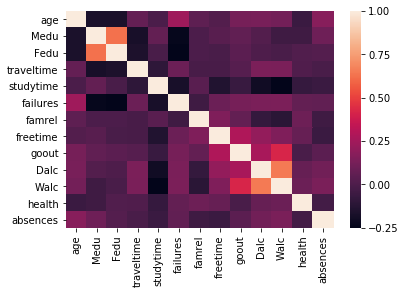

In [11]:
sns.heatmap(df.corr())

C:\Users\hag5kor\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


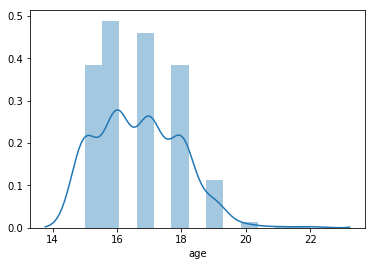

In [12]:
sns.distplot(df['age'])

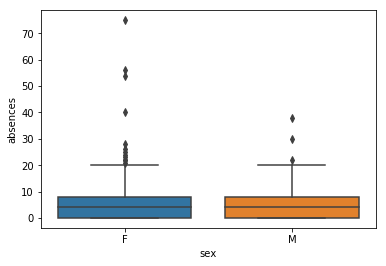

In [13]:
sns.boxplot('sex', 'absences', data=df)

In [14]:
df = df[df['absences']<25]


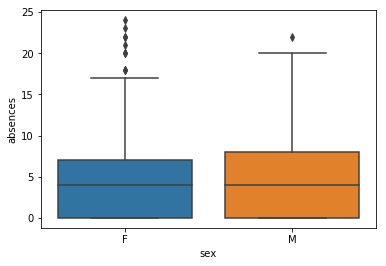

In [15]:
sns.boxplot('sex', 'absences', data=df)

In [16]:
crosstab = pd.crosstab(index=df["sex"], columns=df["passed"])
crosstab

passed,no,yes
sex,,
F,71,130
M,53,132


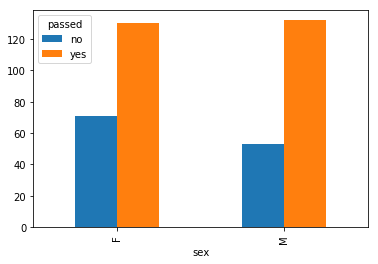

In [17]:
crosstab.plot(kind="bar")

In [18]:
crosstab1 = pd.crosstab(index=df["studytime"], columns=df["passed"])
crosstab1

passed,no,yes
studytime,,
1,35,68
2,67,126
3,15,48
4,7,20


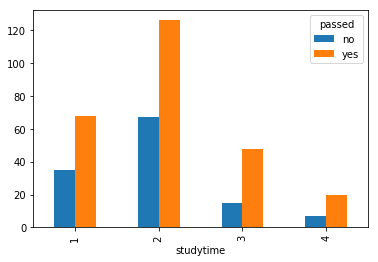

In [19]:
crosstab1.plot(kind="bar")

In [20]:
crosstab2 = pd.crosstab(index=df["goout"], columns=df["passed"])
crosstab2

passed,no,yes
goout,,
1,5,17
2,24,78
3,35,91
4,36,48
5,24,28


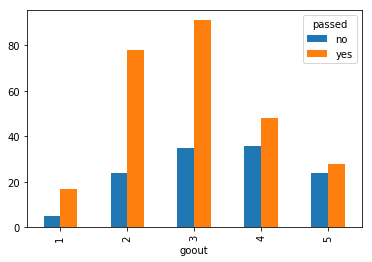

In [21]:
crosstab2.plot(kind="bar")

In [22]:
crosstab3 = pd.crosstab(index=df["Pstatus"], columns=df["passed"])
crosstab3

passed,no,yes
Pstatus,,
A,9,30
T,115,232


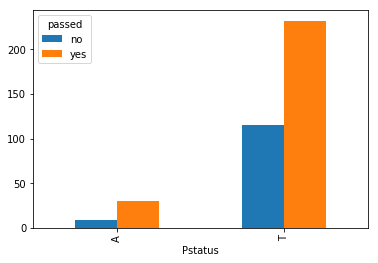

In [23]:
crosstab3.plot(kind="bar")

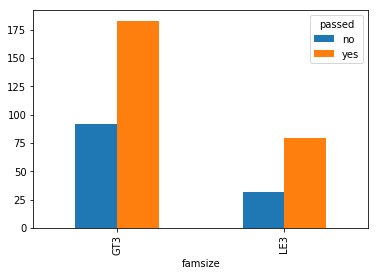

In [24]:
crosstab4 = pd.crosstab(index=df["famsize"], columns=df["passed"])
crosstab4
crosstab4.plot(kind="bar")

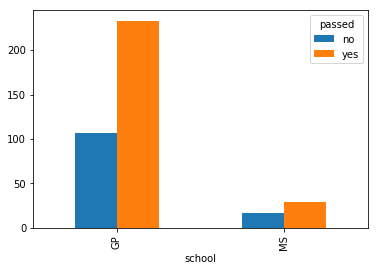

In [25]:
crosstab4 = pd.crosstab(index=df["school"], columns=df["passed"])
crosstab4
crosstab4.plot(kind="bar")

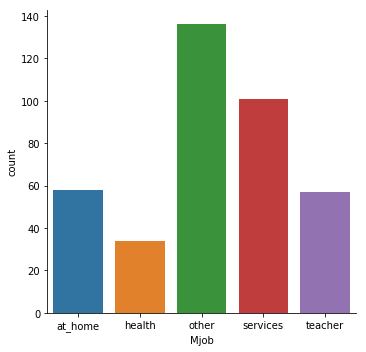

In [26]:
sns.catplot(x='Mjob', kind="count", data=df)

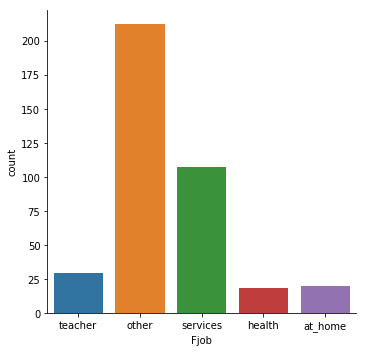

In [27]:
sns.catplot(x='Fjob', kind="count", data=df)

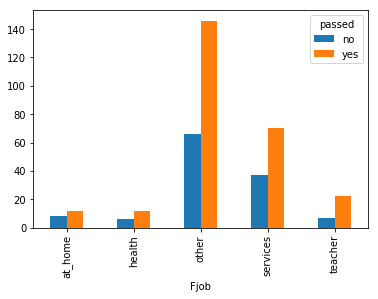

In [28]:
crosstab5 = pd.crosstab(index=df["Fjob"], columns=df["passed"])
crosstab5.plot(kind="bar")

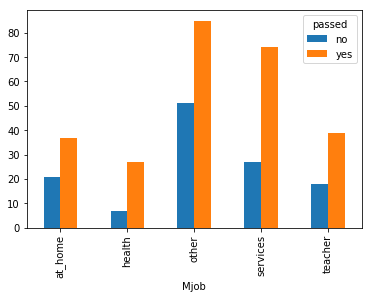

In [29]:
crosstab6 = pd.crosstab(index=df["Mjob"], columns=df["passed"])
crosstab6.plot(kind="bar")

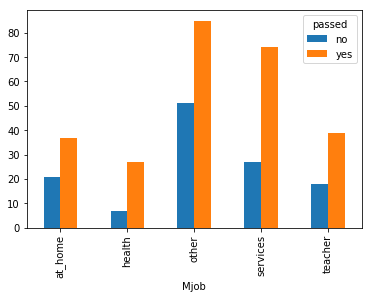

In [30]:
crosstab7 = pd.crosstab(index=df["Mjob"], columns=df["passed"])
crosstab7.plot(kind="bar")

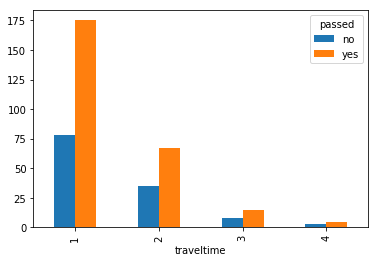

In [31]:
crosstab8 = pd.crosstab(index=df["traveltime"], columns=df["passed"])
crosstab8.plot(kind="bar")

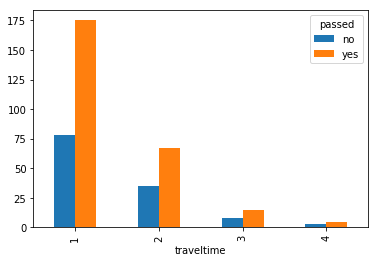

In [32]:
crosstab8 = pd.crosstab(index=df["traveltime"], columns=df["passed"])
crosstab8.plot(kind="bar")

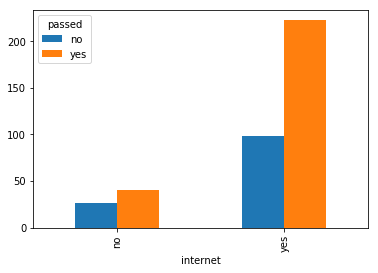

In [33]:
crosstab9 = pd.crosstab(index=df["internet"], columns=df["passed"])
crosstab9.plot(kind="bar")

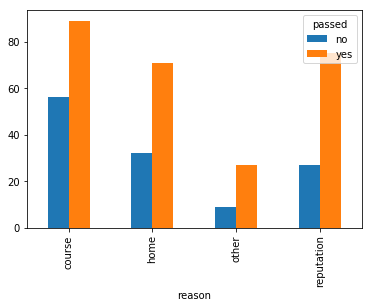

In [34]:
crosstab10 = pd.crosstab(index=df["reason"], columns=df["passed"])
crosstab10.plot(kind="bar")

# Feature Engineering


In [35]:
#Creating Dummy Variables

In [36]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')

In [38]:
num_df

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences']

In [37]:
X_train = num_df[['sex', 'age', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences']]
Y_train = df['passed']

TypeError: list indices must be integers or slices, not list

In [40]:
print(num_df)
X_train = df[num_df]
print(X_train.head())

['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']
   age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0   18     4     4           2          2         0       4         3      4   
1   17     1     1           1          2         0       5         3      3   
2   15     1     1           1          2         3       4         3      2   
3   15     4     2           1          3         0       3         2      2   
4   16     3     3           1          2         0       4         3      2   

   Dalc  Walc  health  absences  
0     1     1       3         6  
1     1     1       3         4  
2     2     3       3        10  
3     1     1       5         2  
4     1     2       5         4  
